# Chapter: Fault Detection & Diagnosis via Supervised Artificial Neural Networks Modeling


# Topic: FFNN model with debutanizer data and fault detection

In [1]:
# packages
import numpy as np
import matplotlib.pyplot as plt

#%% random number seed for result reproducibility 
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [2]:
# read data
data = np.loadtxt('debutanizer_data_withFault.txt') # (Drift) fault starts from last 200 sample onwards

In [3]:
# parate training and test data
data_train = data[:-300,:]
data_test = data[-300:,:]

X_train, y_train = data_train[:,0:-1], data_train[:,-1][:,np.newaxis]
X_test, y_test = data_test[:,0:-1], data_test[:,-1][:,np.newaxis]

In [4]:
# arate estimation and validation data
from sklearn.model_selection import train_test_split

X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 100)

In [6]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Fit FFNN model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# import packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [8]:
# define model
model = Sequential()
model.add(Dense(40, kernel_regularizer=regularizers.L1(0.000001), activation='relu', kernel_initializer='he_normal', input_shape=(7,)))
model.add(Dense(20, kernel_regularizer=regularizers.L1(0.000001), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, kernel_regularizer=regularizers.L1(0.000001)))

# compile model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.005))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 40)                320       
                                                                 
 dense_4 (Dense)             (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________


In [9]:
# fit model
es = EarlyStopping(monitor='val_loss', patience=50)
history = model.fit(X_est, y_est, epochs=2000, batch_size=64, validation_data=(X_val, y_val), callbacks=es)

Epoch 1/2000
27/27 [==============================] - 0s 5ms/step - loss: 0.0405 - val_loss: 0.0241
Epoch 2/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0224 - val_loss: 0.0299
Epoch 3/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 0.0190
Epoch 4/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.0221
Epoch 5/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0185 - val_loss: 0.0197
Epoch 6/2000
27/27 [==============================] - ETA: 0s - loss: 0.025 - 0s 2ms/step - loss: 0.0176 - val_loss: 0.0168
Epoch 7/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.0183
Epoch 8/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.0171
Epoch 9/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0150 - val_loss: 0.0162
Epoch 10/2000
27/27 [==============================] - 0s 2ms/step - loss: 0

Epoch 82/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0128
Epoch 83/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0145
Epoch 84/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0120
Epoch 85/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0123
Epoch 86/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0125
Epoch 87/2000
27/27 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 0.0123
Epoch 88/2000
27/27 [==============================] - 0s 1ms/step - loss: 0.0112 - val_loss: 0.0151
Epoch 89/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0141
Epoch 90/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0108 - val_loss: 0.0117
Epoch 91/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0097 - val_los

27/27 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0108
Epoch 163/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.0108
Epoch 164/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0121
Epoch 165/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0127
Epoch 166/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0086 - val_loss: 0.0107
Epoch 167/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0083 - val_loss: 0.0122
Epoch 168/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0103
Epoch 169/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0101
Epoch 170/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.0118
Epoch 171/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0099
Epoch 243/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0074 - val_loss: 0.0119
Epoch 244/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0100
Epoch 245/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0098
Epoch 246/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0114
Epoch 247/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0111
Epoch 248/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0096
Epoch 249/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0065 - val_loss: 0.0099
Epoch 250/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0132
Epoch 251/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.0069 - val_loss: 0.0099
Epoch 323/2000
27/27 [==============================] - 0s 1ms/step - loss: 0.0069 - val_loss: 0.0093
Epoch 324/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0084
Epoch 325/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0085
Epoch 326/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0083
Epoch 327/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0061 - val_loss: 0.0096
Epoch 328/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0100
Epoch 329/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0087
Epoch 330/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0087
Epoch 331/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.

27/27 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0080
Epoch 403/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0086
Epoch 404/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0100
Epoch 405/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0083
Epoch 406/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0084
Epoch 407/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 0.0096
Epoch 408/2000
27/27 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0088
Epoch 409/2000
27/27 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0086
Epoch 410/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0082
Epoch 411/2000
27/27 [==============================] - 0s 2ms/step - loss: 0.0055 - val_loss: 0.

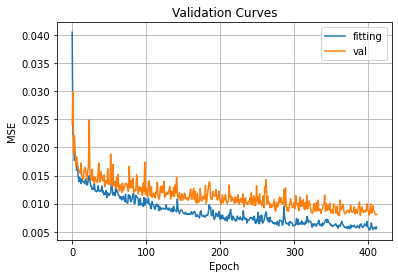

In [10]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='fitting')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.grid()
plt.show()

In [11]:
# predict C4 content
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)
y_est_pred = model.predict(X_est)
y_train_pred = model.predict(X_train)

# metrics
from sklearn.metrics import r2_score
print('R2 for validation data:', r2_score(y_val, y_val_pred))
print('R2 for fitting data:', r2_score(y_est, y_est_pred))

R2 for validation data: 0.6678257422315903
R2 for fitting data: 0.7909901312436801


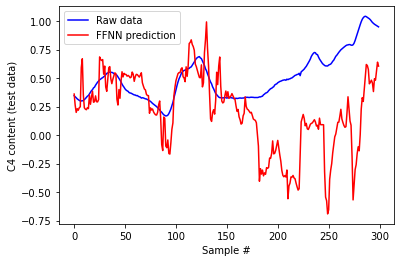

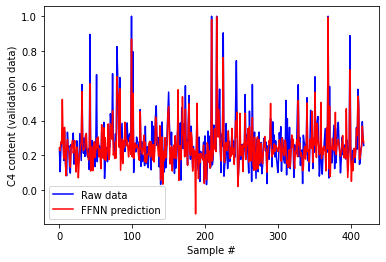

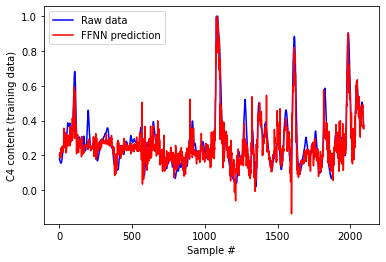

In [12]:
# plots of raw and predicted data
plt.figure()
plt.plot(y_test, 'b', label='Raw data')
plt.plot(y_test_pred, 'r', label='FFNN prediction')
plt.ylabel('C4 content (test data)')
plt.xlabel('Sample #')
plt.legend()

plt.figure()
plt.plot(y_val, 'b', label='Raw data')
plt.plot(y_val_pred, 'r', label='FFNN prediction')
plt.ylabel('C4 content (validation data)')
plt.xlabel('Sample #')
plt.legend()

plt.figure()
plt.plot(y_train, 'b', label='Raw data')
plt.plot(y_train_pred, 'r', label='FFNN prediction')
plt.ylabel('C4 content (training data)')
plt.xlabel('Sample #')
plt.legend()

plt.show()

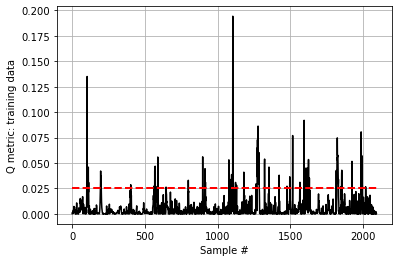

In [16]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                Monitoring statistics for training samples
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Q metric for training samples
error_train = y_train - y_train_pred
Q_train = np.sum(error_train*error_train, axis = 1)
Q_CL = np.percentile(Q_train, 95)

# Q_train plot with CL
plt.figure()
plt.plot(Q_train, color='black')
plt.plot([1,len(Q_train)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.grid()
plt.show()

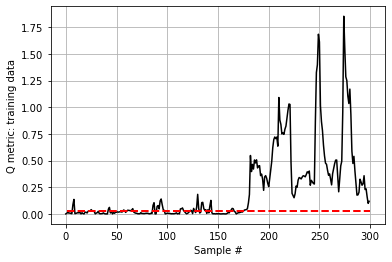

In [15]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                Monitoring statistics for test samples
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Q metric for test samples
error_test = y_test - y_test_pred
Q_test = np.sum(error_test*error_test, axis = 1)

plt.figure()
plt.plot(Q_test, color='black')
plt.plot([1,len(Q_test)],[Q_CL,Q_CL], linestyle='--',color='red', linewidth=2)
plt.xlabel('Sample #')
plt.ylabel('Q metric: training data')
plt.grid()
plt.show()